In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Task 1: Data Manipulation

In [75]:
# Read the provided CSV file ‘data.csv’ and show the basic statistical description about the data
data_df = pd.read_csv(r'C:\Users\alekh\Downloads\data.csv')
data_df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [77]:
# Check if the data has null values
data_df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [79]:
# Replace null values with the mean
data_df.fillna(df.mean(), inplace=True)
data_df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [81]:
# Aggregate data for two columns
columns = ['Duration', 'Pulse']
aggregate = data_df[columns].agg(['min', 'max', 'count', 'mean'])
print("Aggregated data of the columns Duration and Pulse \n {} \n".format(aggregate))

Aggregated data of the columns Duration and Pulse 
          Duration       Pulse
min     15.000000   80.000000
max    300.000000  159.000000
count  169.000000  169.000000
mean    63.846154  107.461538 



In [23]:
# Filter the dataframe to select the rows with calories values between 500 and 1000.
df_filtered = data_df[(data_df['Calories'] >= 500) & (data_df['Calories'] <= 1000)]
df_filtered

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [83]:
# Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
df_filtered_result = data_df[(data_df['Calories'] > 500) & (data_df['Pulse'] < 100)]
df_filtered_result

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [85]:
# Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
df_modified = data_df.drop('Maxpulse', axis=1)
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [87]:
# Delete the “Maxpulse” column from the main df dataframe
data_df.drop('Maxpulse', axis=1, inplace=True)
data_df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [89]:
# Convert the datatype of Calories column to int datatype
data_df['Calories'] = data_df['Calories'].astype(int)
data_df.dtypes

Duration    int64
Pulse       int64
Calories    int32
dtype: object

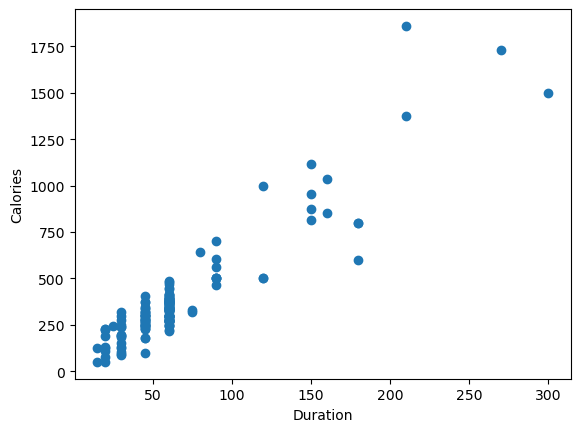

In [51]:
# Using pandas create a scatter plot for the two columns (Duration and Calories). 
plt.scatter(data_df['Duration'], data_df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

Task 2: Linear Regression

In [91]:
# Import the given “Salary_Data.csv”
salary_df = pd.read_csv(r'C:\Users\alekh\Downloads\Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [93]:
# Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [95]:
# Train and predict the model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [97]:
# Calculate the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  21026037.329511296


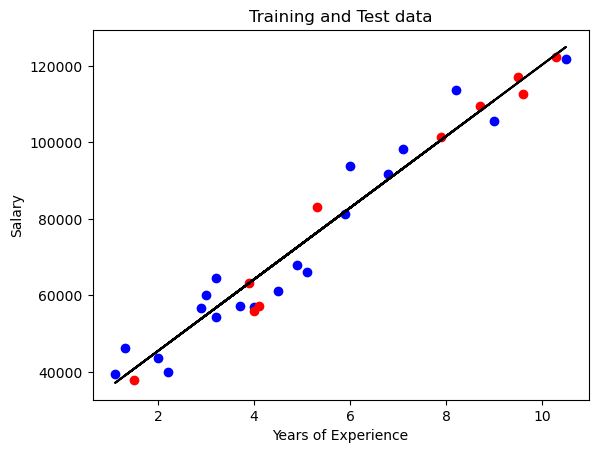

In [99]:
# Visualize both train and test data using scatter plot
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, reg.predict(X_train), color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Training and Test data')
plt.show()

Video Link https://drive.google.com/file/d/114mh3B3Lzu9OcOPgNnnbbcnLGPYBP9GB/view